# 定义路径和导入数据

In [31]:
import os
from os.path import join
import numpy as np
import pandas as pd

In [32]:
os.getcwd()
data_path = join(os.getcwd(), 'data') # data 文件夹的路径

In [33]:
data = pd.read_stata(join(data_path,'auto.dta'))
data.head() # 预览前 5 条数据

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign
0,AMC Concord,4099,22,3.0,2.5,11,2930,186,40,121,3.58,Domestic
1,AMC Pacer,4749,17,3.0,3.0,11,3350,173,40,258,2.53,Domestic
2,AMC Spirit,3799,22,NaN,3.0,12,2640,168,35,121,3.08,Domestic
3,Buick Century,4816,20,3.0,4.5,16,3250,196,40,196,2.93,Domestic
4,Buick Electra,7827,15,4.0,4.0,20,4080,222,43,350,2.41,Domestic


# 数据概览

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74 entries, 0 to 73
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   make          74 non-null     object  
 1   price         74 non-null     int16   
 2   mpg           74 non-null     int16   
 3   rep78         69 non-null     float64 
 4   headroom      74 non-null     float32 
 5   trunk         74 non-null     int16   
 6   weight        74 non-null     int16   
 7   length        74 non-null     int16   
 8   turn          74 non-null     int16   
 9   displacement  74 non-null     int16   
 10  gear_ratio    74 non-null     float32 
 11  foreign       74 non-null     category
dtypes: category(1), float32(2), float64(1), int16(7), object(1)
memory usage: 3.5+ KB


# 描述性统计

## 使用 `decscribe()` 方法

In [35]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,74.0,6165.256757,2949.495885,3291.00,4220.25,5006.500,6332.2500,15906.00
mpg,74.0,21.297297,5.785503,12.00,18.00,20.000,24.7500,41.00
rep78,69.0,3.405797,0.989932,1.00,3.00,3.000,4.0000,5.00
headroom,74.0,2.993243,0.845995,1.50,2.50,3.000,3.5000,5.00
trunk,74.0,13.756757,4.277404,5.00,10.25,14.000,16.7500,23.00
weight,74.0,3019.459459,777.193567,1760.00,2250.00,3190.000,3600.0000,4840.00
length,74.0,187.932432,22.266340,142.00,170.00,192.500,203.7500,233.00
turn,74.0,39.648649,4.399354,31.00,36.00,40.000,43.0000,51.00
displacement,74.0,197.297297,91.837219,79.00,119.00,196.000,245.2500,425.00
gear_ratio,74.0,3.014865,0.456287,2.19,2.73,2.955,3.3525,3.89


## 计算生成

In [36]:
description = [data.min(), data.max(), data.mean(),
               data.std()]  # 依次计算最小值、最大值、均值、标准差
description = pd.DataFrame(
    description, index=['Min', 'Max', 'Mean', 'STD']).T  # 将结果存入数据框
print('描述性统计结果：\n', np.round(description, 2))  # 保留两位小数

描述性统计结果：
                       Min        Max     Mean       STD
make          AMC Concord  Volvo 260      NaN       NaN
price                3291      15906  6165.26    2949.5
mpg                    12         41  21.2973    5.7855
rep78                   1          5   3.4058  0.989932
headroom              1.5          5  2.99324  0.845995
trunk                   5         23  13.7568    4.2774
weight               1760       4840  3019.46   777.194
length                142        233  187.932   22.2663
turn                   31         51  39.6486   4.39935
displacement           79        425  197.297   91.8372
gear_ratio           2.19       3.89  3.01486  0.456287
foreign          Domestic    Foreign      NaN       NaN


# 相关系数

## 计算相关系数矩阵

In [37]:
corr = data.corr(method='pearson')  # pearson 相关系数矩阵
print('相关系数矩阵为：\n', np.round(corr, 2))  # 保留两位小数

相关系数矩阵为：
               price   mpg  rep78  headroom  trunk  weight  length  turn  \
price          1.00 -0.47   0.01      0.11   0.31    0.54    0.43  0.31   
mpg           -0.47  1.00   0.40     -0.41  -0.58   -0.81   -0.80 -0.72   
rep78          0.01  0.40   1.00     -0.15  -0.16   -0.40   -0.36 -0.50   
headroom       0.11 -0.41  -0.15      1.00   0.66    0.48    0.52  0.42   
trunk          0.31 -0.58  -0.16      0.66   1.00    0.67    0.73  0.60   
weight         0.54 -0.81  -0.40      0.48   0.67    1.00    0.95  0.86   
length         0.43 -0.80  -0.36      0.52   0.73    0.95    1.00  0.86   
turn           0.31 -0.72  -0.50      0.42   0.60    0.86    0.86  1.00   
displacement   0.49 -0.71  -0.41      0.47   0.61    0.89    0.84  0.78   
gear_ratio    -0.31  0.62   0.41     -0.38  -0.51   -0.76   -0.70 -0.68   

              displacement  gear_ratio  
price                 0.49       -0.31  
mpg                  -0.71        0.62  
rep78                -0.41        0.41  


## 相关性热力图

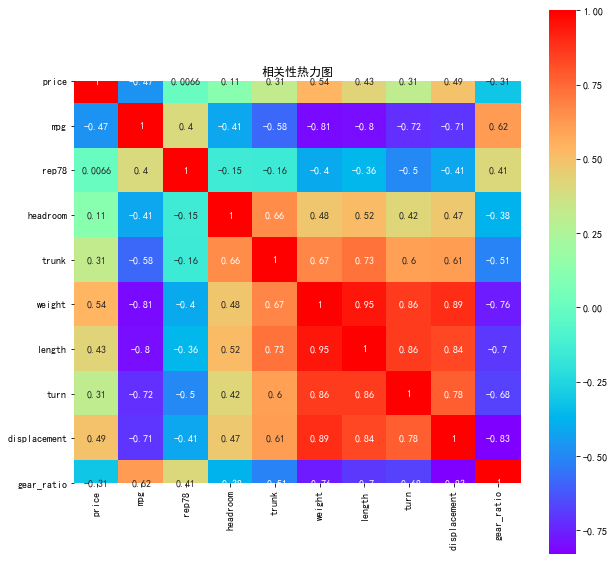

<function matplotlib.pyplot.close(fig=None)>

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

plt.subplots(figsize=(10, 10))  # 设置画面大小
sns.heatmap(corr, annot=True, vmax=1, square=True, cmap="rainbow")
plt.title('相关性热力图')
plt.show()
plt.close

# 绘制散点图

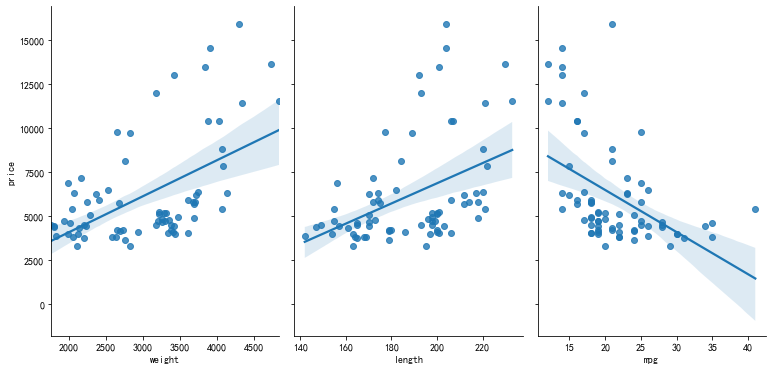

<function matplotlib.pyplot.close(fig=None)>

In [39]:
sns.pairplot(data, x_vars=['weight', 'length', 'mpg'],
             y_vars='price', kind="reg", height=5, aspect=0.7)
plt.show()
plt.close

# 回归模型

In [40]:
from sklearn.linear_model import LinearRegression
Xs = data[['weight', 'length', 'mpg']] 
y = data['price'].values.reshape(-1, 1)
reg = LinearRegression()
reg.fit(Xs, y)
print("The linear model is: price = {:.5} + {:.5}*weight + {:.5}*headroom + {:.5}*length".format(
    reg.intercept_[0], reg.coef_[0][0], reg.coef_[0][1], reg.coef_[0][2]))

The linear model is: price = 1.4542e+04 + 4.3648*weight + -104.87*headroom + -86.789*length


# 模型评估

In [41]:
import statsmodels.api as sm

Xs = np.column_stack((data['weight'], data['length'], data['mpg']))
y = data['price']
X2 = sm.add_constant(Xs)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     12.98
Date:                Tue, 24 Mar 2020   Prob (F-statistic):           7.85e-07
Time:                        18:24:28   Log-Likelihood:                -679.35
No. Observations:                  74   AIC:                             1367.
Df Residuals:                      70   BIC:                             1376.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.454e+04   5890.632      2.469      0.0